In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from ast import literal_eval

In [2]:
save = False

# sns.set(font_scale=1.8)
# save = True

In [3]:
ted_talks = pd.read_csv("../data/ted_talks_selected.csv")
ted_talks

,talk_id,title,speaker_1,occupations,about_speakers,views,recorded_date,published_date,event,available_lang,comments,duration,topics,related_talks,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,2,Simple designs to save a life,Amy Smith,"{0: ['inventor', 'engineer']}","{0: 'Amy Smith designs cheap, practical fixes ...",1724438,2006-02-24,2006-08-15,TED2006,"['ar', 'bg', 'ca', 'de', 'el', 'en', 'es', 'fa...",101.0,906,"['MacArthur grant', 'alternative energy', 'des...","{1561: 'Energy from floating algae pods', 1072...",Fumes from indoor cooking fires kill more than...,"In terms of invention, I'd like to tell you th..."
2,3,How to rebuild a broken state,Ashraf Ghani,{0: ['president-elect of afghanistan']},"{0: 'Ashraf Ghani, Afghanistan’s new president...",981920,2005-07-12,2006-10-18,TEDGlobal 2005,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",75.0,1125,"['business', 'corruption', 'culture', 'economi...","{127: 'Want to help Africa? Do business here',...",Ashraf Ghani's passionate and powerful 10-minu...,"A public, Dewey long ago observed, is constitu..."
3,4,The real future of space exploration,Burt Rutan,{0: ['aircraft engineer']},"{0: ""In 2004, legendary spacecraft designer Bu...",2427994,2006-02-24,2006-10-25,TED2006,"['ar', 'az', 'bg', 'cs', 'de', 'el', 'en', 'es...",196.0,1177,"['NASA', 'aircraft', 'business', 'design', 'en...","{141: ""Inside the world's deepest caves"", 264:...","In this passionate talk, legendary spacecraft ...","I want to start off by saying, Houston, we hav..."
4,5,Great cars are great art,Chris Bangle,{0: ['car designer']},{0: 'Car design is a ubiquitous but often over...,978483,2002-02-02,2007-04-05,TED2002,"['ar', 'bg', 'de', 'en', 'es', 'fr', 'he', 'hr...",81.0,1204,"['business', 'cars', 'design', 'industrial des...","{4: 'The real future of space exploration', 26...",American designer Chris Bangle explains his ph...,"What I want to talk about is, as background, i..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3952,62707,The wildly complex anatomy of a sneaker,Angel Chang,NaN,{0: 'Angel Chang is a womenswear designer work...,219171,2020-04-23,2020-04-23,TED-Ed,"['el', 'en', 'es', 'fr', 'ko', 'pt', 'pt-br']",NaN,303,"['TED-Ed', 'education', 'animation', 'fashion'...",{2756: 'What really happens to the plastic you...,"Australians call them ""runners."" The British k...","Australians call them “runners."" The British k..."
3953,62748,A global pandemic calls for global solutions,Larry Brilliant,"{0: ['epidemiologist', 'philanthropist'], 1: [...","{0: ""TED Prize winner Larry Brilliant has spen...",760969,2020-04-22,2020-04-24,TED2020: The Prequel,"['en', 'es', 'it', 'pt-br']",37.0,941,"['coronavirus', 'pandemic', 'epidemiology', 'v...","{58: 'My wish: Help me stop pandemics', 61303:...",Examining the facts and figures of the coronav...,"Helen Walters: So, Chris, who's up first? Chri..."
3954,62782,The dark history of IQ tests,Stefan C Dombrowski,NaN,NaN,307187,2020-04-27,2020-04-27,TED-Ed,"['en', 'es', 'my', 'pt-br']",NaN,346,"['TED-Ed', 'education', 'history', 'animation'...",{35386: 'How does the Rorschach inkblot test w...,"In 1905, psychologists Alfred Binet and Théodo...","In 1905, psychologists Alfred Binet and Théodo..."
3955,62784,The electrifying speeches of Sojourner Truth,Daina Ramey Berry,NaN,NaN,56582,2020-04-28,2020-04-30,TED-Ed,['en'],NaN,257,"['TED-Ed', 'education', 'animation', 'United S...",{20973: 'The breathtaking courage of Harriet T...,Isabella Baumfree was born into slavery in lat...,"In early 1828, Sojourner Truth approached the ..."


In [4]:
ted_talks.describe()

,talk_id,views,comments,duration
count,3957.000000,3.957000e+03,3318.000000,3957.000000
mean,12427.062168,2.163597e+06,162.789030,723.203690
std,17464.917841,3.467708e+06,269.894466,363.100135
min,1.000000,0.000000e+00,0.000000,60.000000
25%,1242.000000,8.922300e+05,38.000000,389.000000
50%,2323.000000,1.383808e+06,89.000000,735.000000
75%,23785.000000,2.147410e+06,189.000000,974.000000
max,62794.000000,6.505195e+07,6449.000000,3922.000000


# Les plus vus

In [5]:
most_viewed = ted_talks[["title", "views"]].sort_values(by='views', ascending=False).head(10).reset_index(drop=True)
most_viewed

,title,views
0,Do schools kill creativity?,65051954
1,Your body language may shape who you are,57074270
2,This is what happens when you reply to spam email,56932551
3,How great leaders inspire action,49730580
4,The power of vulnerability,47544833
5,How to speak so that people want to listen,41504331
6,Inside the mind of a master procrastinator,37976820
7,"Looks aren't everything. Believe me, I'm a model.",33874546
8,My philosophy for a happy life,33691484
9,The next outbreak? We're not ready,33521780


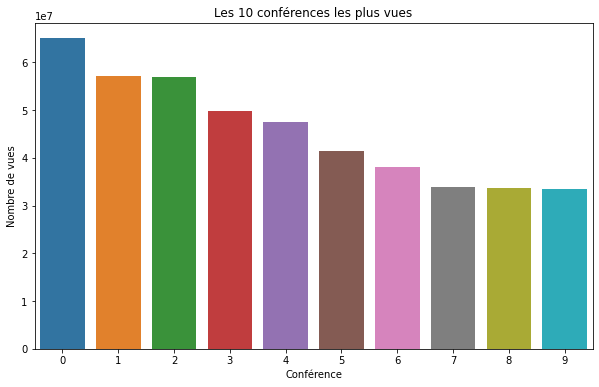

In [6]:
plt.figure(figsize=(10, 6))

sns.barplot(x=list(range(10)), y=most_viewed.views)
plt.title("Les 10 conférences les plus vues")
plt.xlabel("Conférence")
plt.ylabel("Nombre de vues")
if save: plt.savefig("../data/graphs/most_viewed.png")
plt.show()

# Durées

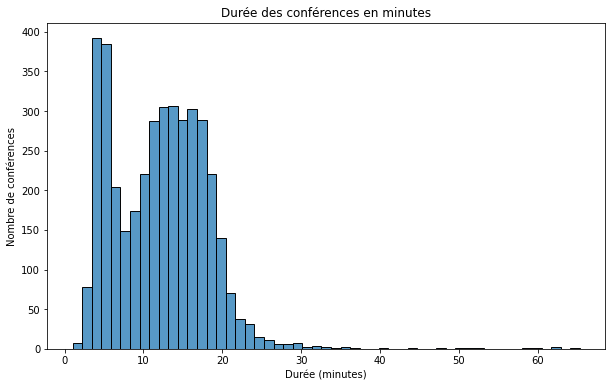

In [7]:
plt.figure(figsize=(10, 6))

sns.histplot(ted_talks.duration / 60)
plt.title("Durée des conférences en minutes")
plt.xlabel("Durée (minutes)")
plt.ylabel("Nombre de conférences")
if save: plt.savefig("../data/graphs/duration.png")
plt.show()

# Corrélations

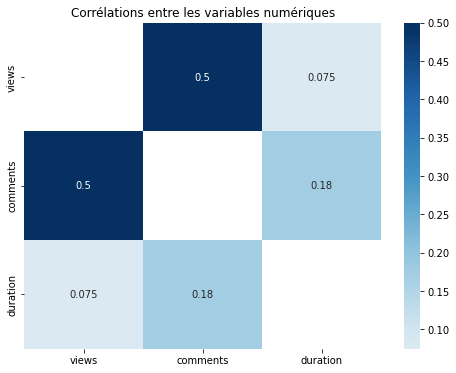

In [8]:
plt.figure(figsize=(8, 6))

sns.heatmap(ted_talks.drop("talk_id", axis=1).corr(), mask=np.eye(3), annot=True, cmap="RdBu", center=0)
plt.title("Corrélations entre les variables numériques")
if save: plt.savefig("../data/graphs/correlations.png")
plt.show()

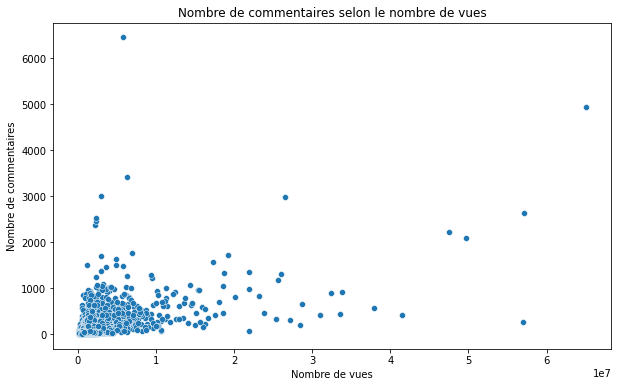

In [9]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x=ted_talks.views, y=ted_talks.comments)
plt.title("Nombre de commentaires selon le nombre de vues")
plt.xlabel("Nombre de vues")
plt.ylabel("Nombre de commentaires")
if save: plt.savefig("../data/graphs/comments_views.png")
plt.show()

# Thèmes à débat

In [10]:
ted_talks["comment_rate"] = ted_talks.comments / ted_talks.views * 1e6

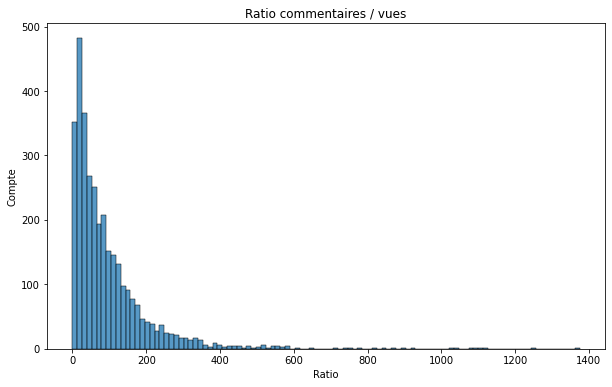

In [11]:
plt.figure(figsize=(10, 6))

sns.histplot(ted_talks["comment_rate"])
plt.title("Ratio commentaires / vues")
plt.xlabel("Ratio")
plt.ylabel("Compte")
if save: plt.savefig("../data/graphs/comment_rate.png")
plt.show()

In [12]:
most_commented_topics = ted_talks.sort_values(by="comment_rate", ascending=False).topics.head(100)

most_commented_topics = most_commented_topics.apply(lambda x: literal_eval(x)).explode().value_counts()

most_commented_topics = most_commented_topics[most_commented_topics > 10]

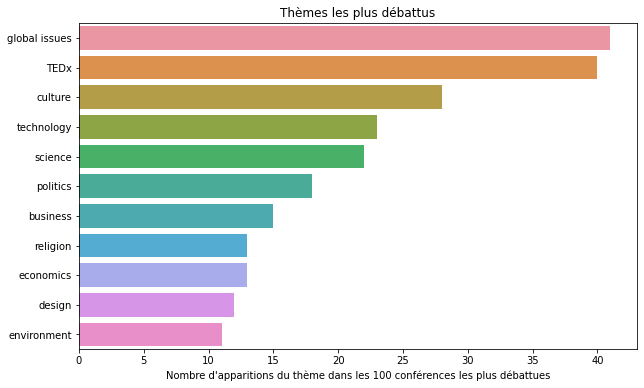

In [13]:
plt.figure(figsize=(10, 6))

sns.barplot(x=most_commented_topics, y=most_commented_topics.index)
plt.title("Thèmes les plus débattus")
plt.xlabel("Nombre d'apparitions du thème dans les 100 conférences les plus débattues")
if save: plt.savefig("../data/graphs/debated_topics.png")
plt.show()

# Thèmes les plus vus

In [14]:
most_commented_topics = ted_talks.sort_values(by="views", ascending=False).topics.head(100)

most_commented_topics = most_commented_topics.apply(lambda x: literal_eval(x)).explode().value_counts()

most_commented_topics = most_commented_topics[most_commented_topics > 10]

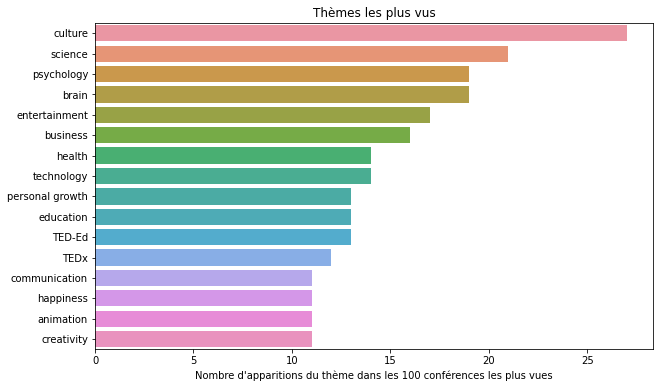

In [15]:
plt.figure(figsize=(10, 6))

sns.barplot(x=most_commented_topics, y=most_commented_topics.index)
plt.title("Thèmes les plus vus")
plt.xlabel("Nombre d'apparitions du thème dans les 100 conférences les plus vues")
if save: plt.savefig("../data/graphs/viewed_topics.png")
plt.show()

# Orateurs

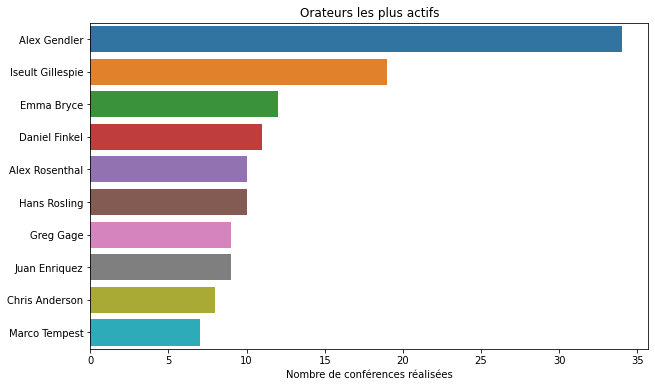

In [16]:
plt.figure(figsize=(10, 6))

frequent_speakers = ted_talks.speaker_1.value_counts().head(10)

sns.barplot(x=frequent_speakers, y=frequent_speakers.index)
plt.title("Orateurs les plus actifs")
plt.xlabel("Nombre de conférences réalisées")
if save: plt.savefig("../data/graphs/speakers.png")
plt.show()

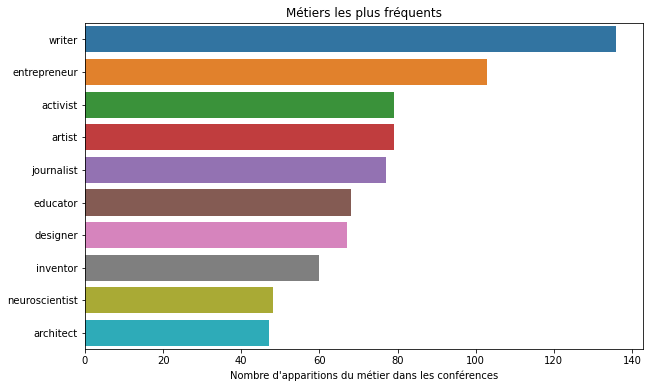

In [17]:
most_common_occupations = ted_talks.occupations.apply(lambda x: literal_eval(x)[0] if pd.notna(x) else x).explode().value_counts()[1:].head(10)

plt.figure(figsize=(10, 6))

sns.barplot(x=most_common_occupations, y=most_common_occupations.index)
plt.title("Métiers les plus fréquents")
plt.xlabel("Nombre d'apparitions du métier dans les conférences")
if save: plt.savefig("../data/graphs/frequent_occupations.png")
plt.show()

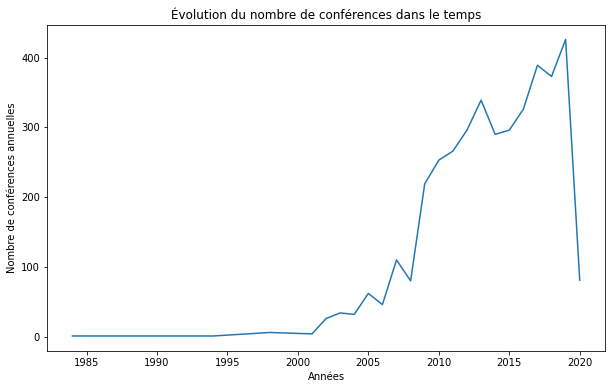

In [18]:
ted_talks.recorded_date = ted_talks.apply(lambda x: x.recorded_date if pd.notnull(x.recorded_date) else x.published_date, axis=1)
ted_talks.recorded_date = pd.to_datetime(ted_talks.recorded_date)

talks_by_year = ted_talks.recorded_date.dt.year.value_counts()
# talks_by_year = talks_by_year[talks_by_year.index < 2020]

plt.figure(figsize=(10, 6))

sns.lineplot(x=talks_by_year.index, y=talks_by_year)
plt.title("Évolution du nombre de conférences dans le temps")
plt.xlabel("Années")
plt.ylabel("Nombre de conférences annuelles")
if save: plt.savefig("../data/graphs/talks_evolution.png")
plt.show()

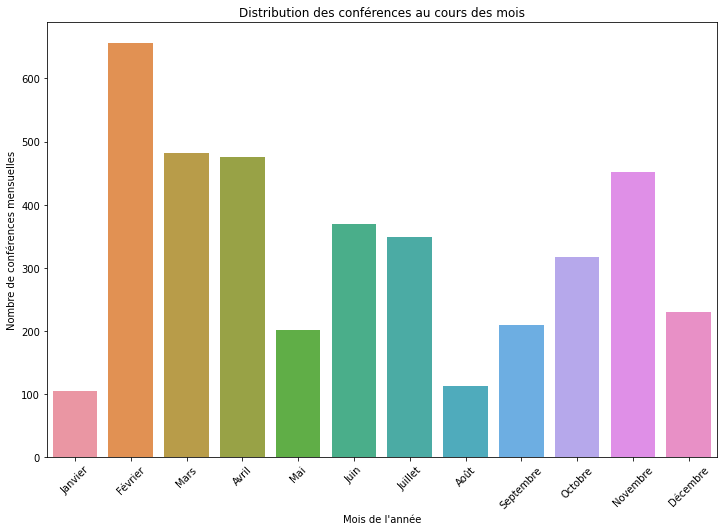

In [19]:
talks_by_month = ted_talks.recorded_date.dt.month.value_counts().sort_index()
months = ["Janvier", "Février", "Mars", "Avril", "Mai", "Juin", "Juillet", "Août", "Septembre", "Octobre", "Novembre", "Décembre"]

plt.figure(figsize=(12, 8))

sns.barplot(x=months, y=talks_by_month)
plt.xticks(rotation=45)
plt.title("Distribution des conférences au cours des mois")
plt.xlabel("Mois de l'année")
plt.ylabel("Nombre de conférences mensuelles")
if save: plt.savefig("../data/graphs/months_talks.png")
plt.show()

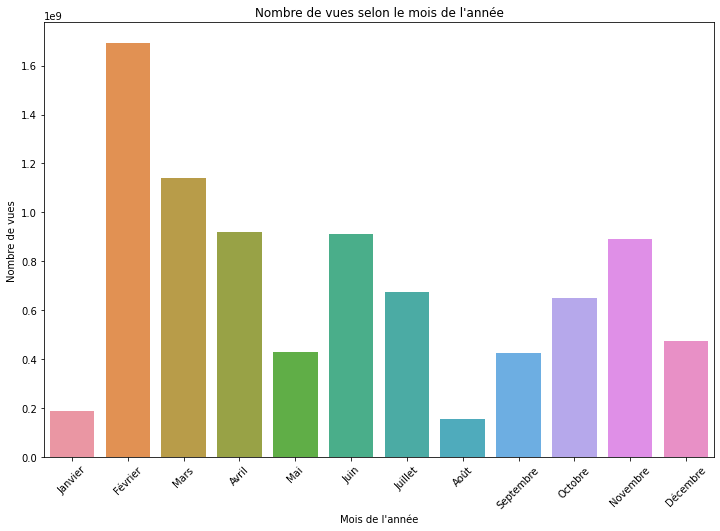

In [20]:
ted_talks["recorded_month"] = ted_talks.recorded_date.dt.month

views_by_months = ted_talks.groupby("recorded_month").sum()["views"]

plt.figure(figsize=(12, 8))

sns.barplot(x=months, y=views_by_months)
plt.xticks(rotation=45)
plt.title("Nombre de vues selon le mois de l'année")
plt.xlabel("Mois de l'année")
plt.ylabel("Nombre de vues")
if save: plt.savefig("../data/graphs/months_views.png")
plt.show()

In [21]:
talks_by_year_month = ted_talks.groupby(pd.Grouper(key="recorded_date", freq="M")).count()["talk_id"]
talks_by_year_month = talks_by_year_month[talks_by_year_month.index.year > 1996]
talks_by_year_month

recorded_date
1997-01-31     0
1997-02-28     0
1997-03-31     0
1997-04-30     0
1997-05-31     0
              ..
2019-12-31    45
2020-01-31    20
2020-02-29    22
2020-03-31    19
2020-04-30    20
Freq: M, Name: talk_id, Length: 280, dtype: int64

In [22]:
years = talks_by_year_month.index.year.unique()

df_year_month = []

for year in years:
    to_append = list(talks_by_year_month[talks_by_year_month.index.year == year])
    if year == 1984:
        to_append = [0] + to_append
    df_year_month.append(to_append)

df_year_month = pd.DataFrame(df_year_month, columns=months)
df_year_month.index = years
df_year_month.fillna(0, inplace=True)

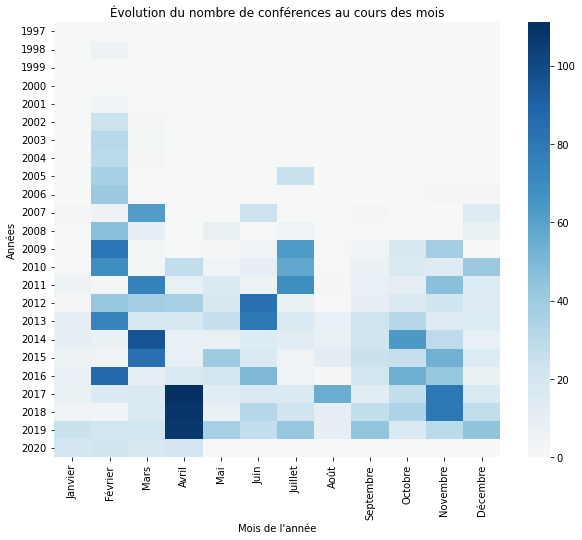

In [23]:
plt.figure(figsize=(10, 8))

sns.heatmap(pd.DataFrame(df_year_month), cmap="RdBu", center=0)
plt.title("Évolution du nombre de conférences au cours des mois")
plt.xlabel("Mois de l'année")
plt.ylabel("Années")
if save: plt.savefig("../data/graphs/year_month_evolution.png")
plt.show()

# Boxplots

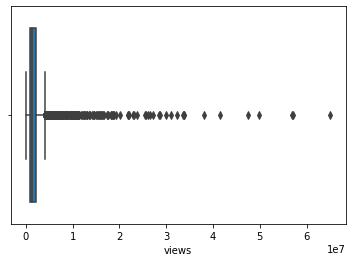

In [24]:
sns.boxplot(x=ted_talks.views)
plt.show()

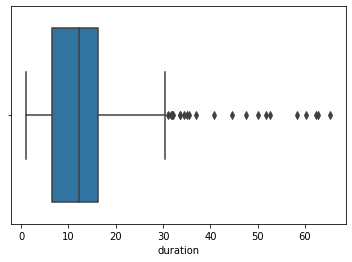

In [25]:
sns.boxplot(x=ted_talks.duration / 60)
plt.show()

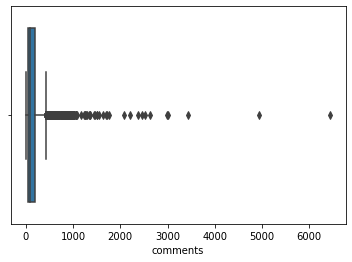

In [26]:
sns.boxplot(x=ted_talks.comments)
plt.show()

# Thèmes

In [27]:
# Source : https://towardsdatascience.com/dealing-with-list-values-in-pandas-dataframes-a177e534f173
def boolean_df(item_lists, unique_items):
    # Create empty dict
    bool_dict = {}
    
    # Loop through all the tags
    for i, item in enumerate(unique_items):
        
        # Apply boolean mask
        bool_dict[item] = item_lists.apply(lambda x: item in x)
            
    # Return the results as a dataframe
    return pd.DataFrame(bool_dict)

In [28]:
def evaluate(x):
    if pd.isna(x):
        return x
    return literal_eval(x)

ted_talks.topics = ted_talks.topics.apply(evaluate)

In [29]:
one_hot_topics = boolean_df(ted_talks.topics, ted_talks.topics.explode().unique())
one_hot_topics["year"] = ted_talks.recorded_date.dt.year
one_hot_topics

,alternative energy,cars,climate change,culture,environment,global issues,science,sustainability,technology,MacArthur grant,...,start-up,gay,inclusion,testing,development,rap,coronavirus,autism,TED Connects,year
0,True,True,True,True,True,True,True,True,True,False,...,False,False,False,False,False,False,False,False,False,2006
1,True,False,False,False,False,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,2006
2,False,False,False,True,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,2005
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,2006
4,False,True,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,2002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3952,False,False,True,False,True,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,2020
3953,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,False,False,True,False,False,2020
3954,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,2020
3955,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,2020


In [30]:
most_talked_ted = ted_talks.topics.explode().value_counts().head(12).index
most_talked = most_talked_ted.drop(["TED-Ed", "TEDx"])
most_talked

Index(['science', 'technology', 'culture', 'global issues', 'society',
       'design', 'social change', 'animation', 'business', 'health'],
      dtype='object')

In [31]:
top_topics_by_year = one_hot_topics.groupby("year").sum()[most_talked]
top_topics_by_year = top_topics_by_year[(top_topics_by_year.index >= 2010) & (top_topics_by_year.index != 2020)]
top_topics_by_year.index = pd.to_datetime(top_topics_by_year.index, format="%Y")
top_topics_by_year

,science,technology,culture,global issues,society,design,social change,animation,business,health
year,,,,,,,,,,
2010-01-01,67,64,65,64,6,44,8,1,49,21
2011-01-01,76,88,76,55,4,54,9,0,25,15
2012-01-01,76,74,55,55,9,33,9,25,33,30
2013-01-01,67,72,56,41,2,33,13,69,34,29
2014-01-01,55,41,25,33,8,17,12,47,22,34
2015-01-01,72,62,20,37,37,36,28,46,15,57
2016-01-01,70,79,23,44,111,37,83,48,38,52
2017-01-01,92,70,30,31,147,34,117,33,36,58
2018-01-01,103,91,43,24,105,34,91,18,30,46


[]

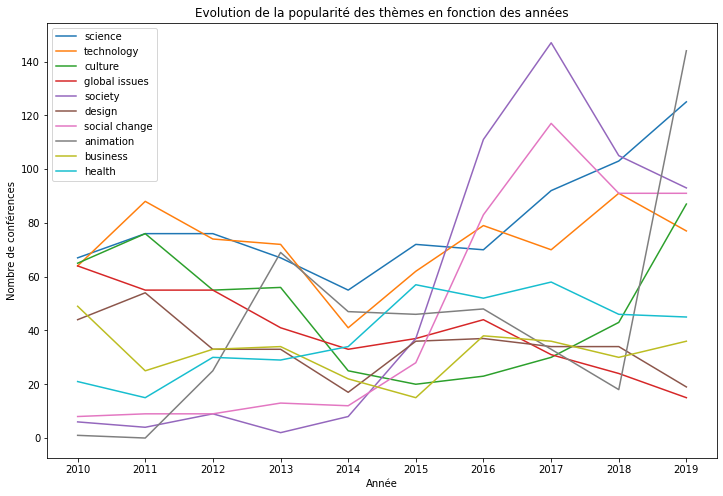

In [32]:
plt.figure(figsize=(12, 8))

plt.plot(top_topics_by_year)
plt.title("Evolution de la popularité des thèmes en fonction des années")
plt.xlabel("Année")
plt.ylabel("Nombre de conférences")
plt.legend(top_topics_by_year.columns)
plt.plot()

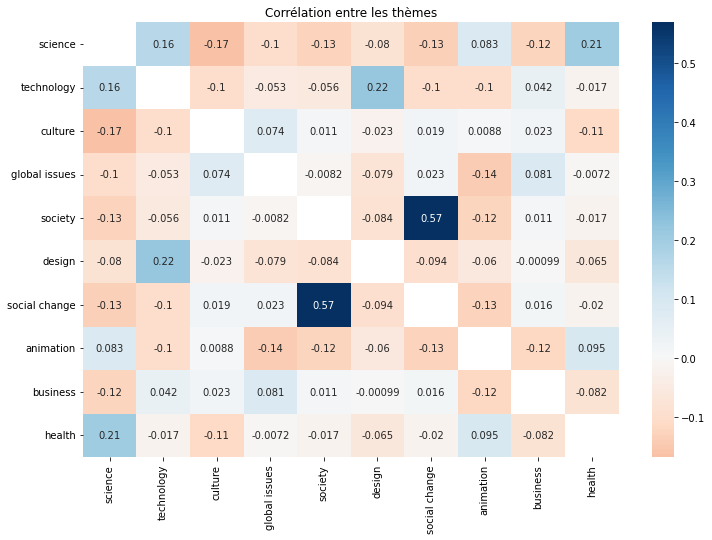

In [33]:
plt.figure(figsize=(12,8))
sns.heatmap(one_hot_topics[most_talked].corr(),
            mask=np.eye(10), cmap="RdBu", center=0, annot=True)
plt.title("Corrélation entre les thèmes")
plt.show()